# 第4章 数据可视化

In [1]:
#在Jupyter notebook中图形可显示
%matplotlib inline  
import matplotlib.pyplot as plt #导入matplotlib.pyplot
import pandas as pd

## 4.1 Python绘图基础

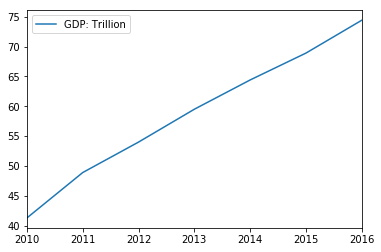

In [2]:
# 例4-1：pandas 绘图
from pandas import DataFrame

gdp = [41.3,48.9,54.0,59.5,64.4,68.9,74.4]
data = DataFrame({'GDP: Trillion':gdp}, index=['2010','2011','2012','2013','2014','2015','2016']) 
data.plot() 
#plt.show()

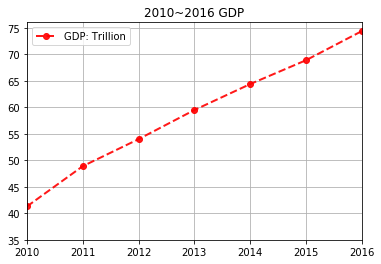

In [3]:
# pandas绘图参数设置
data.plot(title='2010~2016 GDP',LineWidth=2, marker='o', linestyle='dashed',color='r', grid=True,alpha=0.9,use_index=True,yticks=[35,40,45,50,55,60,65,70,75])


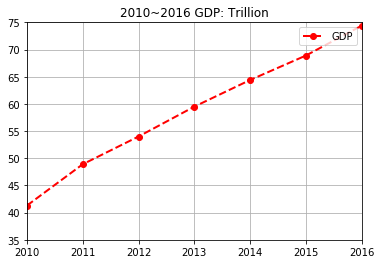

In [5]:
#使用matplotlib绘制图形
plt.figure()   #创建绘图对象  
GDPdata=[41.3,48.9,54.0,59.5,64.4,68.9,74.4]    #准备绘图的序列数据
plt.plot(GDPdata,color="red",linewidth=2,linestyle='dashed',marker='o',label='GDP')    #绘图
#精细设置图元
plt.title('2010~2016 GDP: Trillion')
plt.xlim(0,6)          #x轴绘图范围
plt.ylim(35,75)      #y轴绘图范围
plt.xticks(range(0,7),('2010','2011','2012','2013','2014','2015','2016')) #将x轴刻度映射为字符串
plt.legend(loc='upper right')      #在右上角显示图例说明
plt.grid()       #显示网格线

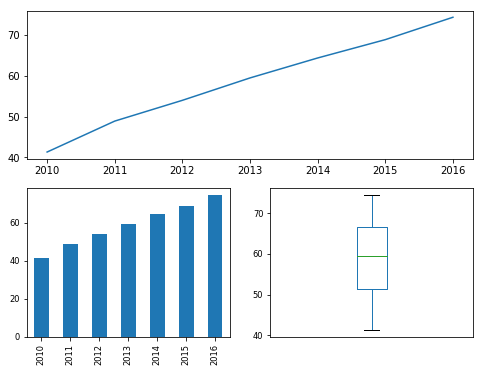

In [6]:
#例4-2：多子图绘制
from pandas import Series
data=Series([41.3,48.9,54.0,59.5,64.4,68.9,74.4], 
index=['2010','2011','2012','2013','2014','2015','2016'])
fig=plt.figure(figsize=(8,6)) #figsize定义图形大小
ax1=fig.add_subplot(2,1,1)   #创建子图1 
ax1.plot(data)               #用AxesSubplot绘制折线图
ax2=fig.add_subplot(2,2,3)   #创建子图2 
data.plot(kind='bar',use_index=True,fontsize='small',ax=ax2)#用andas绘柱状图
ax3=fig.add_subplot(2,2,4)   #创建子图3 
data.plot(kind='box',fontsize='small',xticks=[],ax=ax3) #用pandas绘柱状图

In [68]:
#将图形保存至文件
fig.savefig('2010-2016GDP.jpg',dpi=400,bbox_inches='tight')

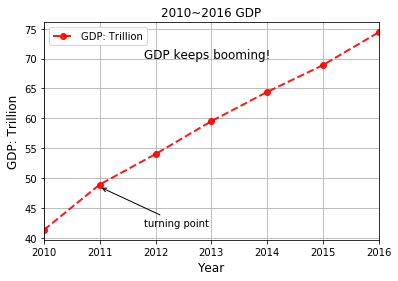

In [3]:
#例4-3 pyplot设置图元
data.plot(title='2010~2016 GDP',LineWidth=2, marker='o', linestyle='dashed',color='r',grid=True,alpha=0.9)
plt.annotate('turning point',xy=(1,48.5),xytext=(1.8,42), arrowprops=dict(arrowstyle='->'))
plt.text(1.8,70,'GDP keeps booming!',fontsize='larger')
plt.xlabel('Year',fontsize=12)
plt.ylabel('GDP: Trillion',fontsize=12)
plt.savefig("GDP.png",dpi=200,bbox_inches='tight') #保存图形到文件

## 4.2可视化数据探索

### 4.2.1 绘制常用图形

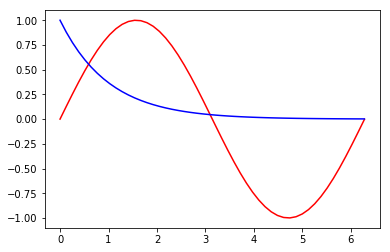

In [2]:
#例4-4 绘制函数图
import numpy as np                    #导入numpy
x = np.linspace(0,6.28,50)       #start,end, num-points
y = np.sin(x)                     #计算y=sin(x)序列值
plt.plot(x,y, color='r')      #用红色绘图y=sin(x)
plt.plot(x,np.exp(-x),c='b')  #用蓝色绘图y=exp(-x)

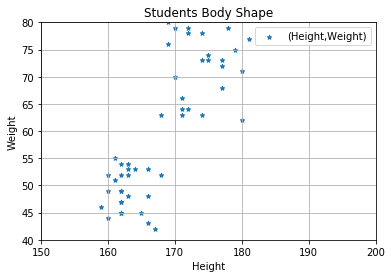

In [2]:
#2. 散点图（Scatter diagram）
#例4-5：绘制散点图观察学生身高和体重之间的关系。
import pandas as pd
stdata = pd.read_csv('data\students.csv')      #读文件
stdata.plot(kind='scatter',x='Height',y='Weight',title='Students Body Shape', marker='*',grid=True, xlim=[150,200], ylim=[40,80], label='(Height,Weight)')    #绘图

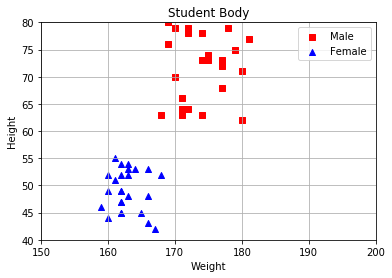

In [79]:
#将数据按性别分组，分别绘制散点图
#将数据按男生和女生分组
data1= stdata[stdata['Gender'] == 'male']  #筛选出男生
data2= stdata[stdata['Gender'] == 'female']  #筛选出女生
#分组绘制男生、女生的散点图
plt.figure()
plt.scatter(data1['Height'],data1['Weight'],c='r',marker='s',label='Male')   
plt.scatter(data2['Height'],data2['Weight'],c='b',marker='^',label='Female') 
plt.xlim(150,200)                 #x轴范围
plt.ylim(40,80)              #y轴范围
plt.title('Student Body')    #标题
plt.xlabel('Weight')             #x轴标题
plt.ylabel('Height')             #y轴标题
plt.grid()                         #网格线
plt.legend(loc='upper right')  #图例显示位置

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024710DE0B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024711121400>]], dtype=object)

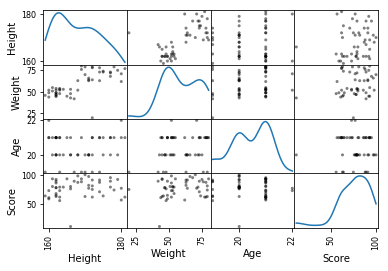

In [5]:
#例4-6: 绘制散点图矩阵观察学生各项信息
data = stdata[['Height', 'Weight','Age','Score']]  #准备数据
pd.plotting.scatter_matrix(data,diagonal='kde',color='k')  #绘图

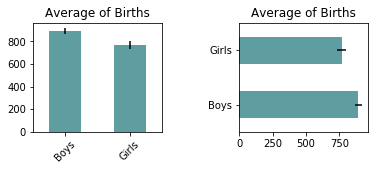

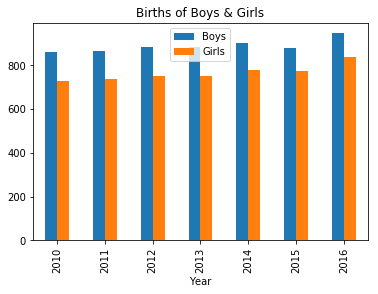

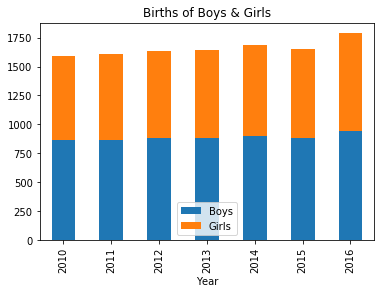

In [3]:
#3. 柱状图 
#例4-7：绘制出生人口性别比较图

data = pd.read_csv('data\population.csv', index_col ='Year') 
data1 = data[['Boys','Girls']]
mean = np.mean(data1,axis=0)      #计算均值
std = np.std(data1,axis=0)        #计算标准差     
#创建图
fig = plt.figure(figsize = (6,2)) #设置图片大小
plt.subplots_adjust(wspace = 0.6) #设置两个图之间的纵向间隔
#绘制均值的垂直和水平柱状图，标准差使用误差线来表示
ax1 = fig.add_subplot(1, 2, 1)
mean.plot(kind='bar',yerr=std,color='cadetblue',title = 'Average of Births', rot=45, ax=ax1)
ax2 = fig.add_subplot(1, 2, 2)
mean.plot(kind='barh',xerr=std,color='cadetblue',title = 'Average of Births',ax=ax2)
#绘制复式柱状图和堆叠柱状图
data1.plot(kind='bar',title = 'Births of Boys & Girls')
data1.plot(kind='bar', stacked=True,title = 'Births of Boys & Girls')


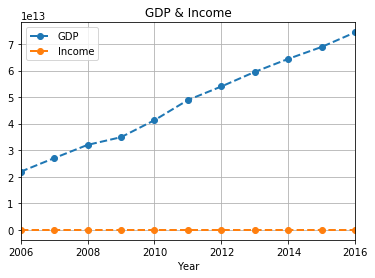

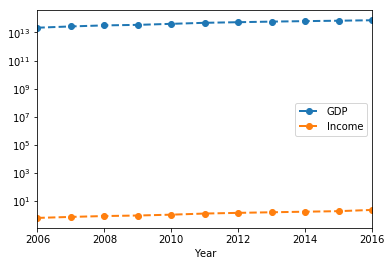

In [13]:
#4. 折线图
#例4-8：绘制国民经济生产总值GDP和居民人均可支配收入Income的折线图

data = pd.read_csv('data\GDP.csv', index_col = 'Year')   
data.plot(title='GDP & Income',LineWidth=2,marker='o',linestyle='dashed', grid=True,use_index=True) #折线图
data.plot(logy=True,LineWidth=2,marker='o',linestyle='dashed',) #半对数折线图

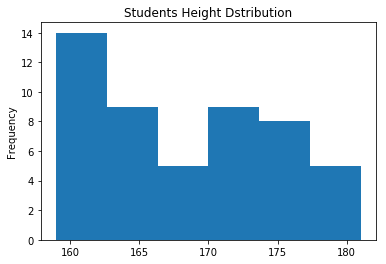

In [6]:
# 5. 直方图（Histogram）
#例4-9：绘制学生成绩分布直方图
stdata = pd.read_csv('data\students.csv')      #读文件
stdata['Height'].plot(kind='hist',bins=6,title='Students Height Dstribution') #绘图

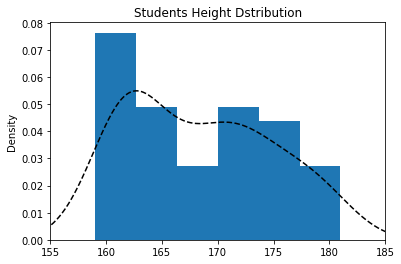

In [94]:
#6. 密度图（Kernel Density Estimate）
stdata['Height'].plot(kind='hist',bins=6,normed=True,title='Students Age Dstribution') #绘图
stdata['Height'].plot(kind='kde',title='Students Height Dstribution', xlim=[155,185],
style = 'k--')   #绘制密度图

TV        29408.5
Weibo      4652.8
WeChat     6110.8
dtype: float64


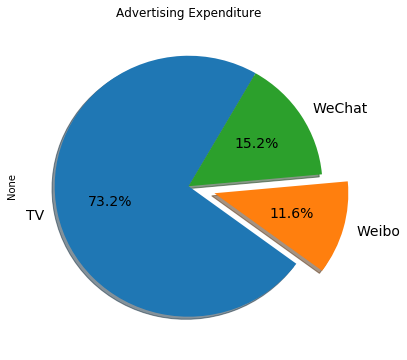

In [5]:
#7.饼图（Pie Chart）
#例4-10：绘制各类广告投入占比的饼图
#准备数据（各类广告投入费用汇总）
data = pd.read_csv('data/advertising.csv')
piedata = data[['TV','Weibo','WeChat']]
datasum = piedata.sum()  
print(datasum)
#绘制饼图
datasum.plot( kind='pie', figsize=(6,6), title='Advertising Expenditure',fontsize=14,explode=[0,0.2,0],shadow=True,startangle=60, autopct='%1.1f%%')

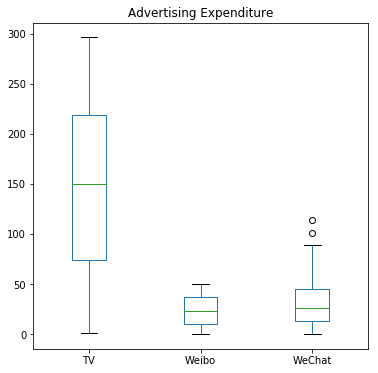

In [100]:
#箱须图（Box Plot）
#例4-11：绘制各类广告投入的箱须图

data = pd.read_csv('data\Advertising.csv')
advdata = data[['TV','Weibo','WeChat']]
advdata.plot(kind='box', figsize=(6,6), title='Advertising Expenditure')

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


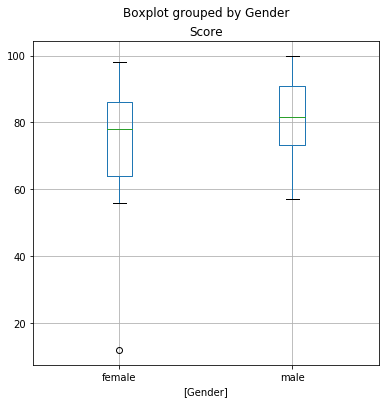

In [104]:
#按性别绘制学生体重的箱须图
stdata = pd.read_csv('data\students.csv')
stdata1 = stdata[['Gender','Score']]
stdata1.boxplot(by='Gender',figsize=(6,6))

## 4.2.2 地图绘制

### 例4-13： 上海各区GDP地图

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np

#创建一个Figure对象
plt.figure(figsize=(16,8))     
#定义地图实例并绘制基本图
#m = Basemap(llcrnrlon=77,llcrnrlat=14,urcrnrlon=140,urcrnrlat=51,projection='lcc',lat_1=33,lat_2=45,lon_0=100)

m = Basemap(llcrnrlon=120.8,llcrnrlat=30.5,urcrnrlon=122.2,urcrnrlat=31.9,projection='lcc',lat_1=30.4,lat_2=31.55,lon_0=121.5)
#m.drawstates(linewidth=3)     #绘制省边界
    
#绘制上海各区边界
m.readshapefile('data/Shapefile/CHN_adm_shp/CHN_adm3', 'County', drawbounds=True)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
#准备数据，绘制GDP数据点
data = pd.read_csv('data/ShanghaiGDPPinyin.csv',index_col='District')  #读取数据文件
print(data)

lat = np.array(data["Latitude"])    # 获取各区纬度值
lon = np.array(data["Longitude"])   # 获取各区经度值
gdp = np.array(data["GDP"])         # 获取GDP值

size=(gdp/np.max(gdp))*1000       # 绘制散点图时GDP值对应点的大小
x,y = m(lon,lat)                  # 确定各区经纬度坐标点
m.scatter(x,y,s=size)             #在地图上绘制散点图

In [ ]:
# 绘制经线和纬线
parallels = np.arange(30.5,31.9,0.5) 
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) # 绘制纬线

meridians = np.arange(120.5,122.2,0.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) # 绘制经线

#m.etopo() # 绘制地形图，浮雕样式

### 例4-14： 上海各区人口地图

In [ ]:
from matplotlib.patches import Polygon #导入Polygonx
from matplotlib.colors import rgb2hex  #导入rgb2hex

#创建一个Figure对象
plt.figure(figsize=(16,8))     
#定义地图实例并绘制基本图
m = Basemap(llcrnrlon=120.8,llcrnrlat=30.5,urcrnrlon=122.2,urcrnrlat=31.9,projection='lcc',lat_1=30.4,lat_2=31.55,lon_0=121.5)  
#绘制上海各区边界
m.readshapefile('data/Shapefile/CHN_adm_shp/CHN_adm3', 'states', drawbounds=True)

In [ ]:
#准备数据
data = pd.read_csv('data/ShanghaiGDP.csv',index_col='District')  #读取数据文件
statenames=[]    #区名列表初始化空
colors={}        #颜色字典初始化位空
cmap = plt.cm.YlOrRd  #设置颜色渐变方案
vmax = 800   #人口最大值
vmin =60     #人口最小值
print(data)

In [ ]:
#对地图实例中的每个区根据区名称获取人口数量并转为颜色值
for shapedict in m.states_info:  
    statename = shapedict['NL_NAME_3']
    p = statename.split('|')  
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    s = s[:2]
    statenames.append(s)
    if s in data.index:
         pop = data['Population'][s]    #s区的人口数量
         colors[s] = cmap(np.sqrt((pop - vmin) / (vmax - vmin)))[:3] #s区颜色计算
    else:
         colors[s]=cmap(0,0,0)  #其他区颜色

In [ ]:
#对每个区多边形填充颜色
    ax = plt.gca()    #获取当前子图
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    if color!=rgb2hex(cmap(0,0,0)):
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)
plt.show